<a href="https://colab.research.google.com/github/Padmajasharma/Upliance/blob/main/Upliance_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

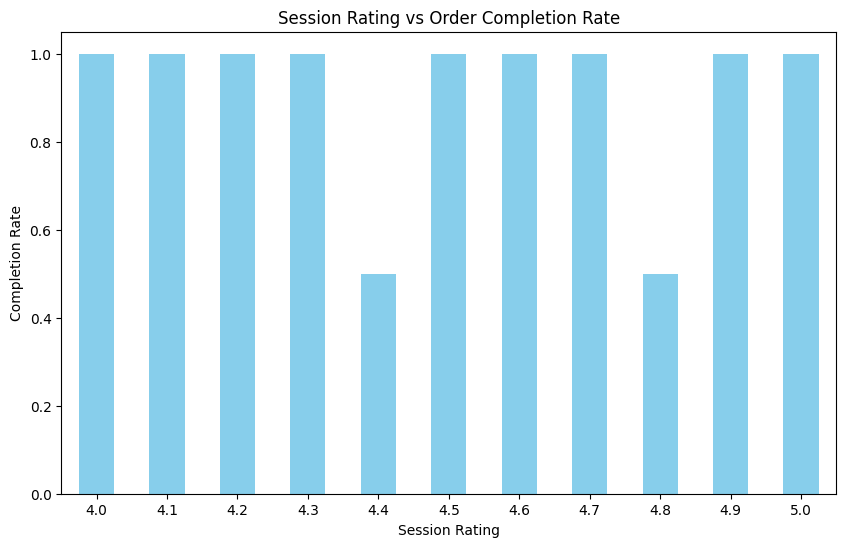

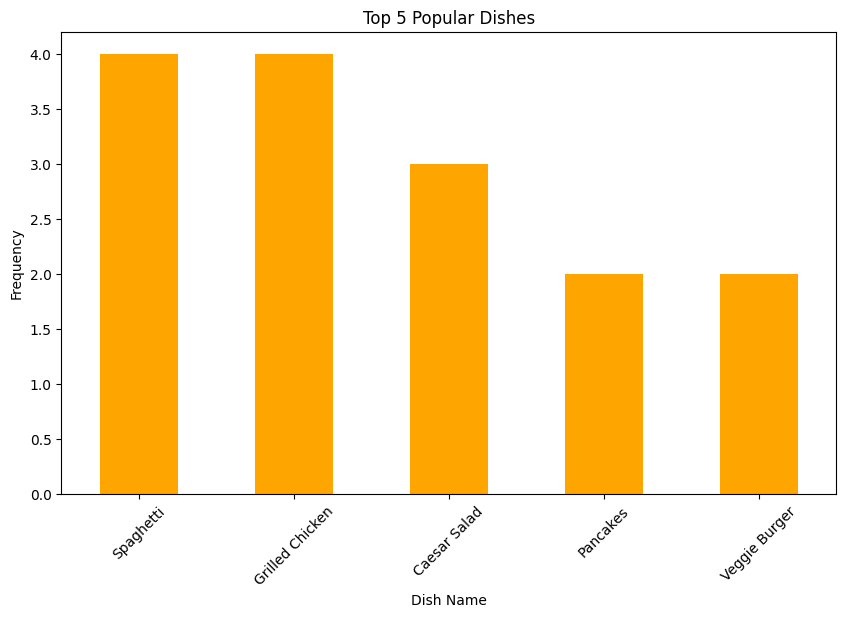

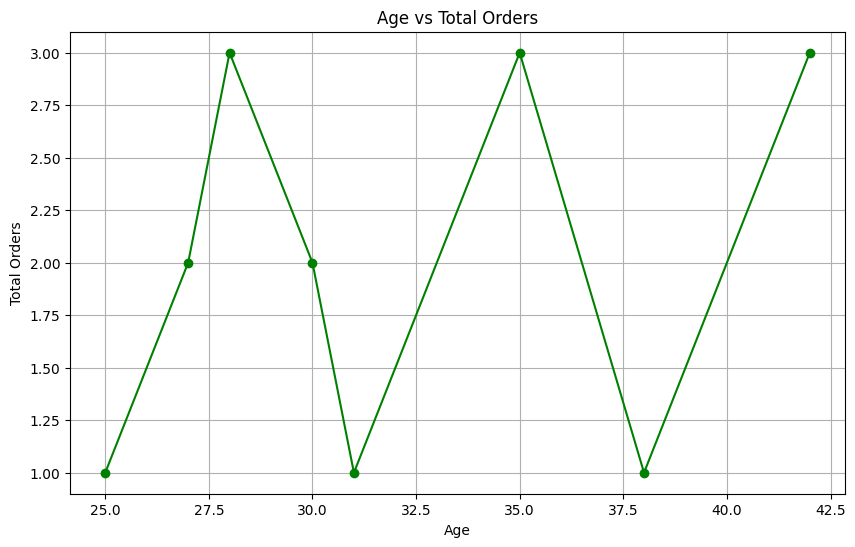

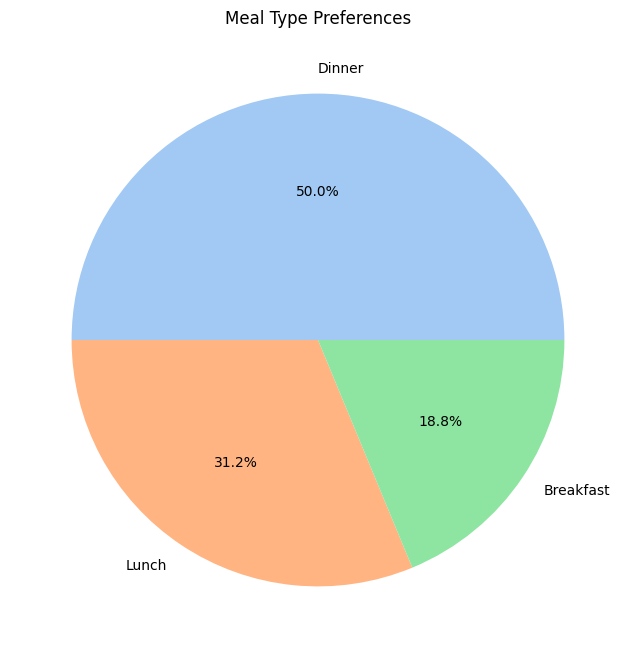

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


user_details = pd.read_excel('Assignment.xlsx', sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel('Assignment.xlsx', sheet_name='CookingSessions.csv')
order_details = pd.read_excel('Assignment.xlsx', sheet_name='OrderDetails.csv')


order_details['Rating'] = order_details['Rating'].fillna(order_details['Rating'].mean())

user_details.columns = user_details.columns.str.strip()
cooking_sessions.columns = cooking_sessions.columns.str.strip()
order_details.columns = order_details.columns.str.strip()


merged_data = order_details.merge(cooking_sessions, on=['User ID', 'Session ID', 'Dish Name'], how='left') \
                           .merge(user_details, on='User ID', how='left')

merged_data.rename(columns={'Meal Type_x': 'Meal Type'}, inplace=True)
merged_data.drop(columns=['Meal Type_y'], inplace=True)


order_status_analysis = merged_data.groupby('Session Rating')['Order Status'].value_counts(normalize=True).unstack()


popular_dishes = merged_data['Dish Name'].value_counts()


age_orders_analysis = merged_data.groupby('Age')['Order ID'].count()


meal_preferences = merged_data['Meal Type'].value_counts()


order_status_analysis['Completed'].plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Session Rating vs Order Completion Rate')
plt.ylabel('Completion Rate')
plt.xlabel('Session Rating')
plt.xticks(rotation=0)
plt.show()


popular_dishes.head(5).plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Top 5 Popular Dishes')
plt.ylabel('Frequency')
plt.xlabel('Dish Name')
plt.xticks(rotation=45)
plt.show()


age_orders_analysis.plot(kind='line', marker='o', color='green', figsize=(10, 6))
plt.title('Age vs Total Orders')
plt.ylabel('Total Orders')
plt.xlabel('Age')
plt.grid(True)
plt.show()


meal_preferences.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette('pastel'))
plt.title('Meal Type Preferences')
plt.ylabel('')
plt.show()

with open('Report.txt', 'w') as f:
    f.write("Key Insights and Recommendations:\n")
    f.write("\n1. Popular Dishes:\n")
    f.write(popular_dishes.head(5).to_string())
    f.write("\n\n2. Insights from Session Ratings:\n")
    f.write(order_status_analysis.to_string())
    f.write("\n\n3. Age Groups and Order Trends:\n")
    f.write(age_orders_analysis.to_string())
    f.write("\n\n4. Recommendations:\n")
    f.write("- Promote top dishes during peak meal times.\n")
    f.write("- Improve user experience for users with low session ratings.\n")
    f.write("- Target marketing campaigns for age groups with high order volumes.\n")
